# 맥북에서 폰트 오류날때 방법

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 비지도학습 Scaling

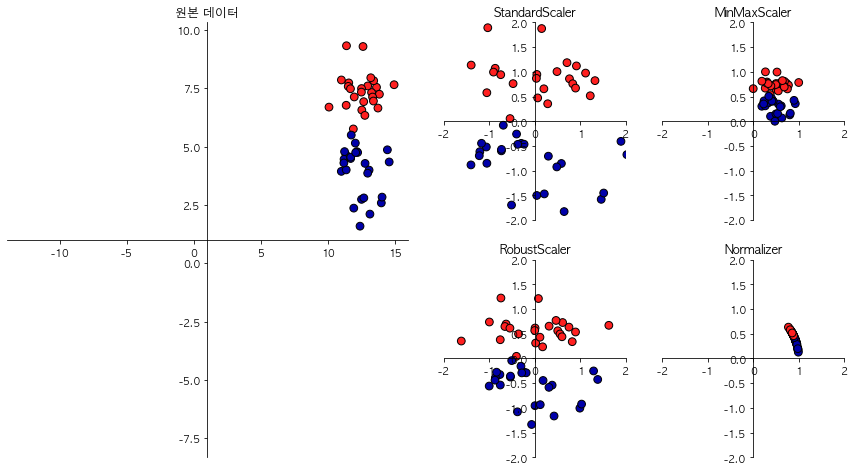

In [2]:
import numpy as np
from scipy import sparse
import pandas as pd
import mglearn

%matplotlib inline 

mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
X_train_scaled = scaler.transform(X_train)

print("변환된 후 크기",X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n",X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n",X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n",X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n",X_train_scaled.max(axis=0))

변환된 후 크기 (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성별 최소값:\n",X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n",X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


# 주성분분석(PCA)

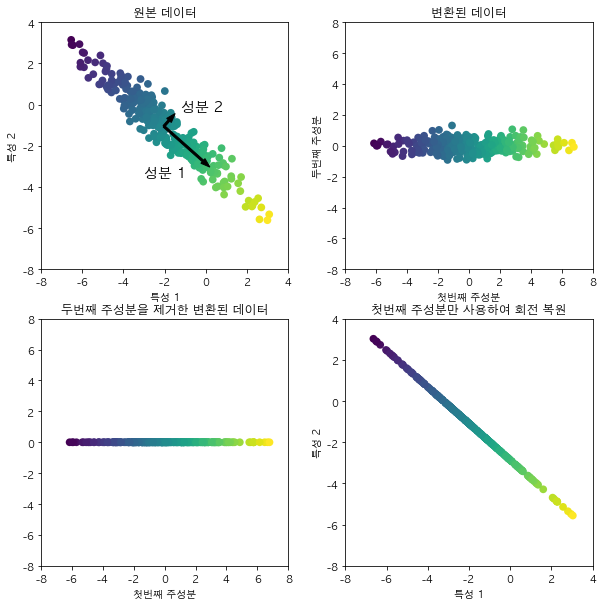

In [7]:
mglearn.plots.plot_pca_illustration()

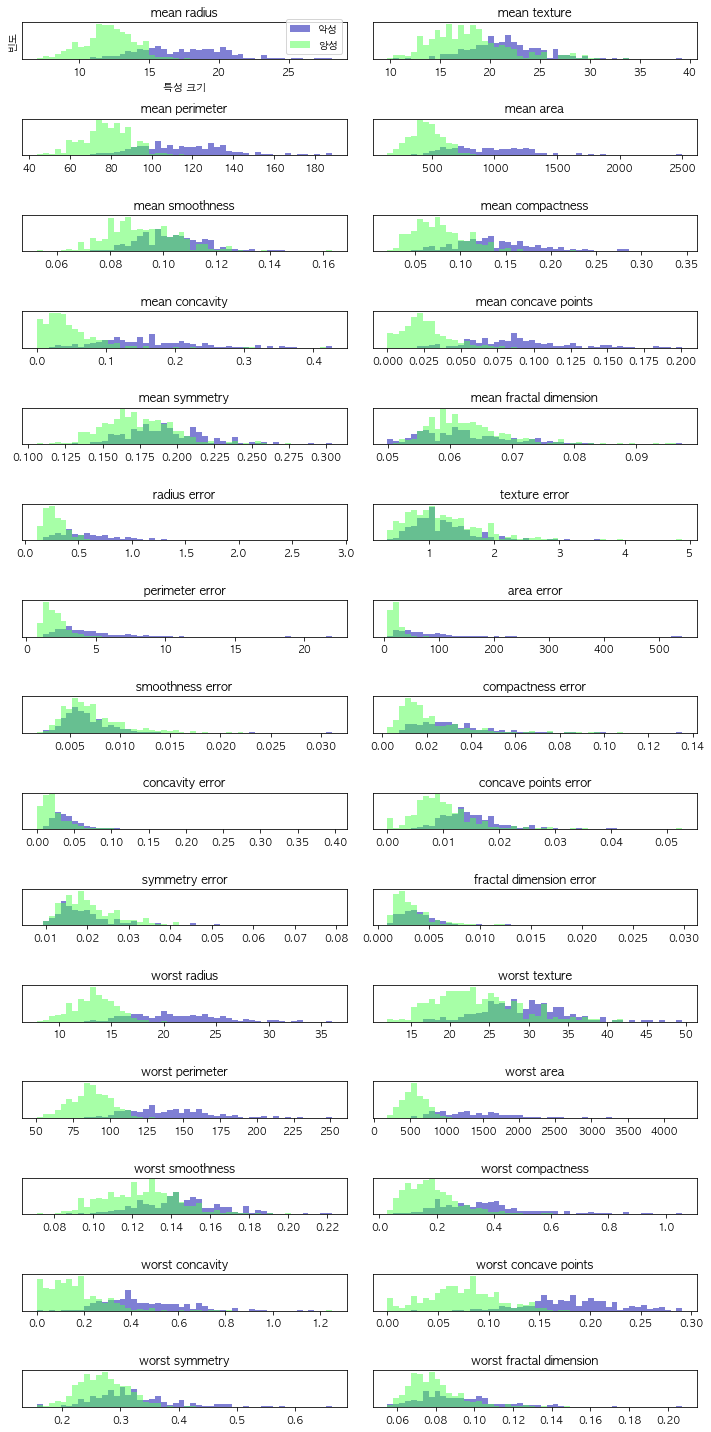

In [8]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target ==1]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성","양성"], loc="best")
fig.tight_layout()

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:",str(X_scaled.shape))
print("축소된 데이터 형태:",str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '주성분')

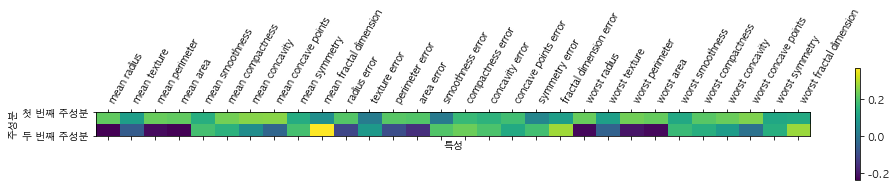

In [11]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [12]:
print("PCA 주성분:",pca.components_) 

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


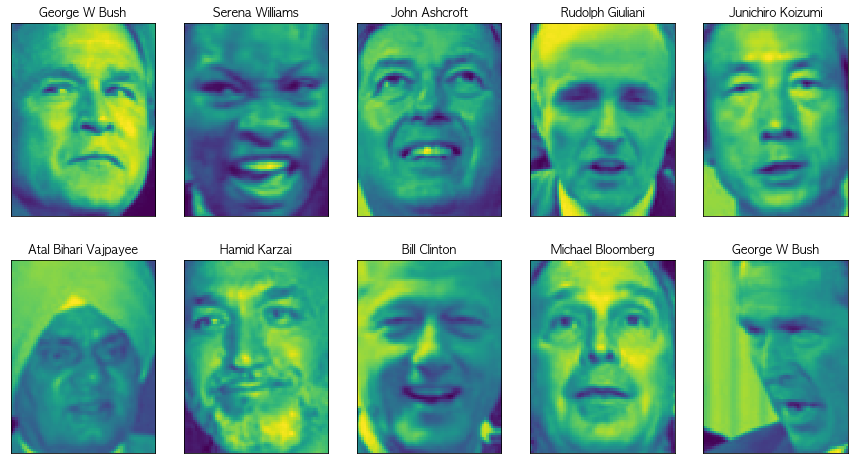

In [13]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [14]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

In [15]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,stratify=y_people,random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))



1-최근접 이웃의 테스트 세트 점수: 0.35


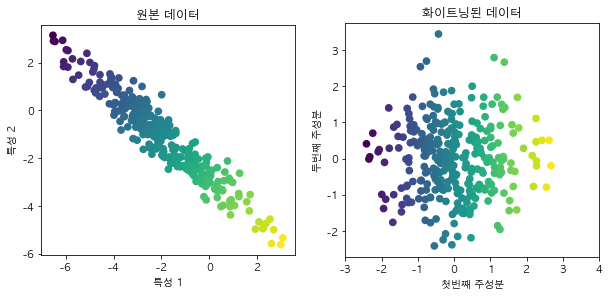

In [16]:
mglearn.plots.plot_pca_whitening()

In [17]:
pca = PCA(n_components =100, whiten =True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:",X_train_pca.shape)
print("X_test_pca.shape:",X_test_pca.shape)

X_train_pca.shape: (1066, 100)
X_test_pca.shape: (356, 100)


In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.41


In [19]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


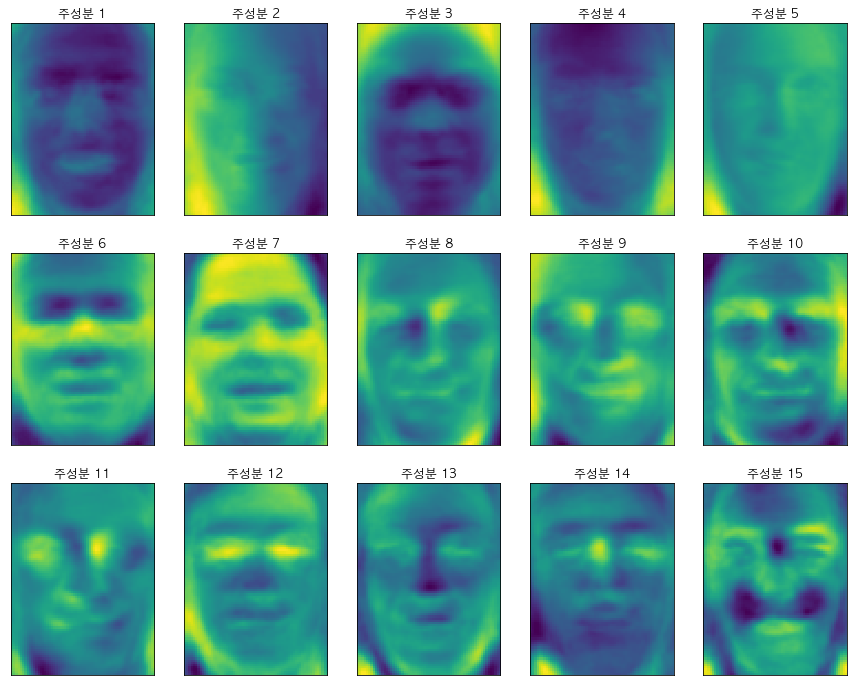

In [20]:
fig, axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

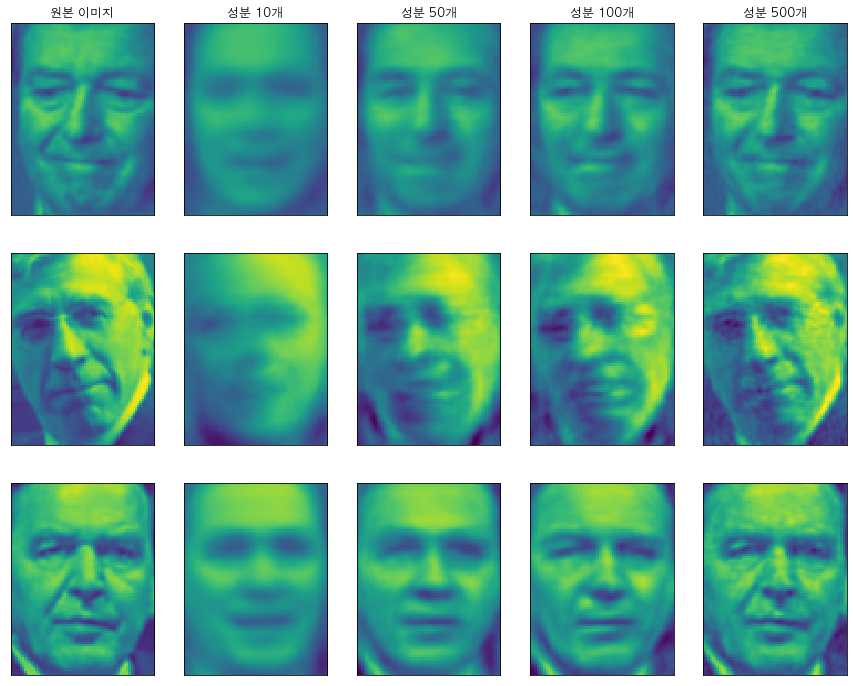

In [21]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두 번째 주성분')

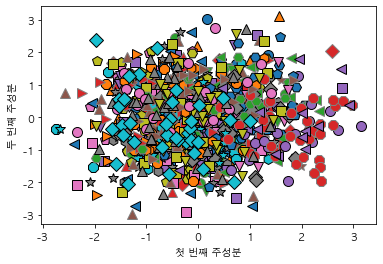

In [22]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1],y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

# 비음수 행렬 분해

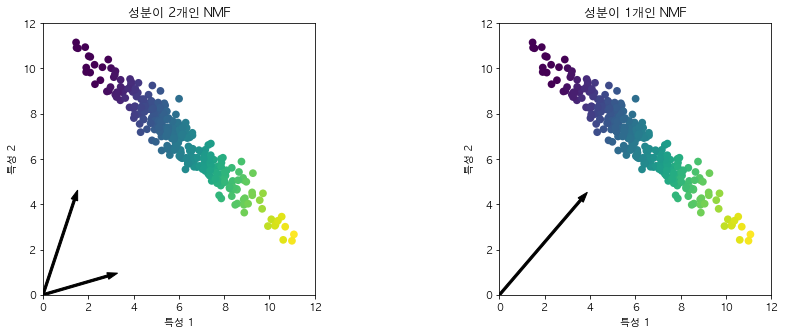

In [23]:
mglearn.plots.plot_nmf_illustration()

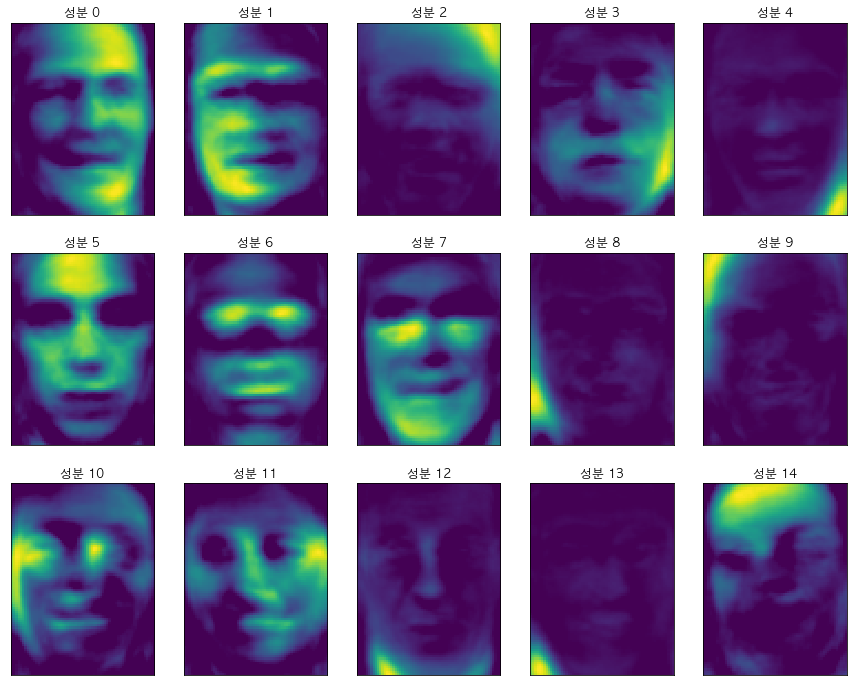

In [24]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0, max_iter=1000,tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})

for i , (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

# 4번째 성분으로 정렬하여 이미지 출력

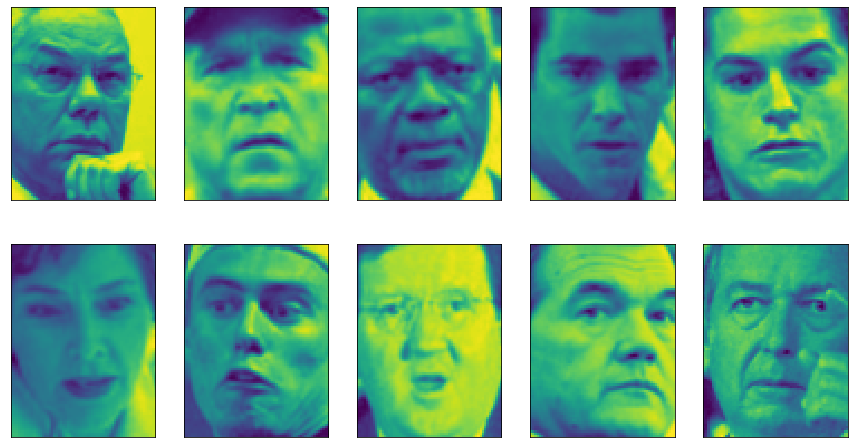

In [25]:
compn =3 

inds =np.argsort(X_train_nmf[:,compn])[::-1]
fig ,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

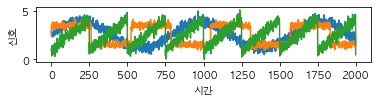

In [26]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("시간")
plt.ylabel("신호")

In [27]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)
print("측정 데이터 형태:",X.shape)

측정 데이터 형태: (2000, 100)


In [28]:
nmf = NMF(n_components=3, random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:",S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [29]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

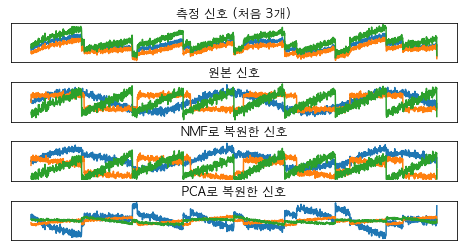

In [30]:
models = [X,S,S_,H]
names = ['측정 신호 (처음 3개)','원본 신호','NMF로 복원한 신호','PCA로 복원한 신호']

fig, axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})

for model, name, ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

# 매니폴드 학습 (숫자 샘플)

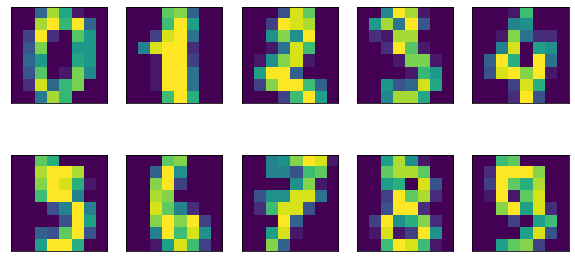

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

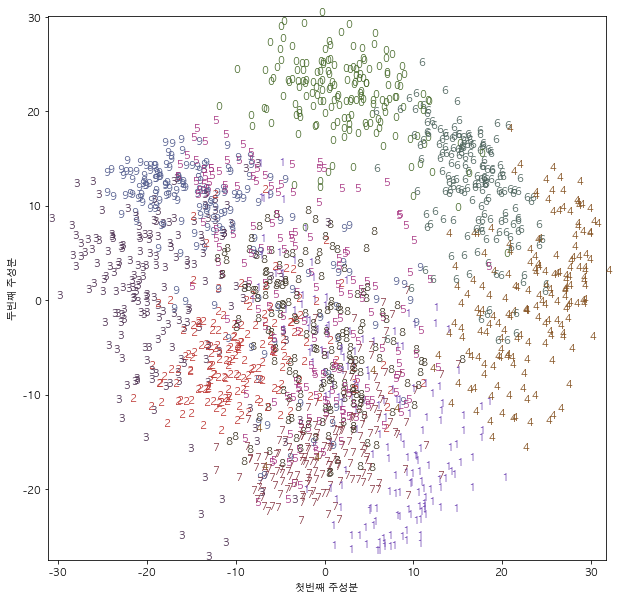

In [32]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.fit_transform(digits.data)
colors = ["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E"]


plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max()) 


for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1], str(digits.target[i]),color = colors[digits.target[i]])

plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()


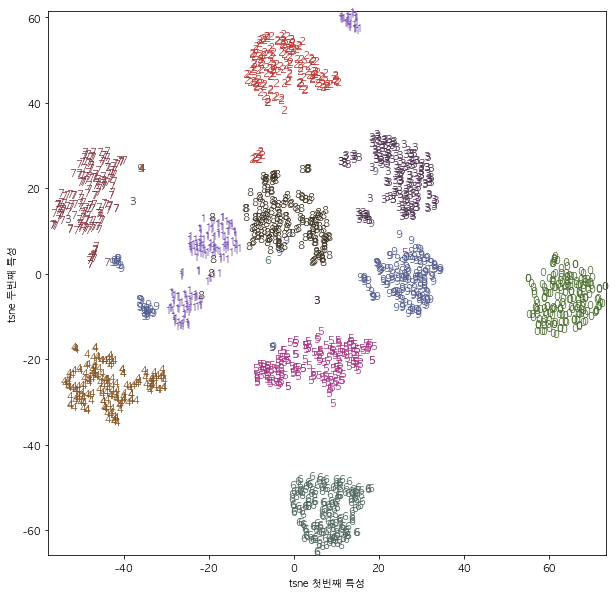

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1) 
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1) 

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1]
             ,str(digits.target[i]),color =colors[digits.target[i]],fontdict={'size' : 10})

plt.xlabel('tsne 첫번째 특성')
plt.ylabel('tsne 두번째 특성')
plt.show()

# 군집


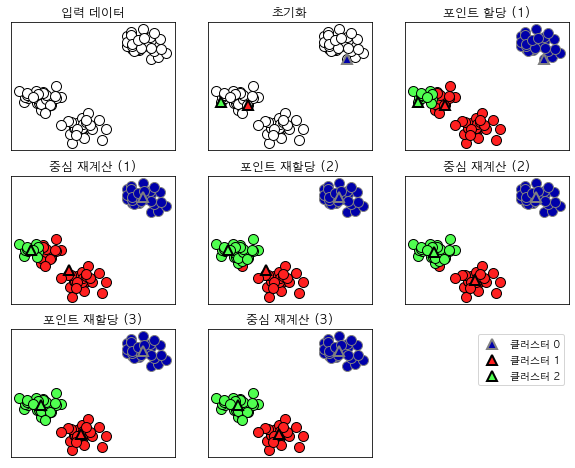

In [34]:
mglearn.plots.plot_kmeans_algorithm()

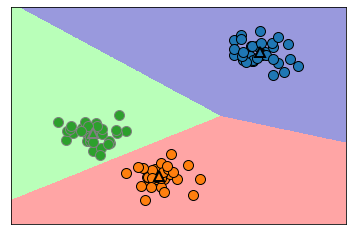

In [35]:
mglearn.plots.plot_kmeans_boundaries()

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [37]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


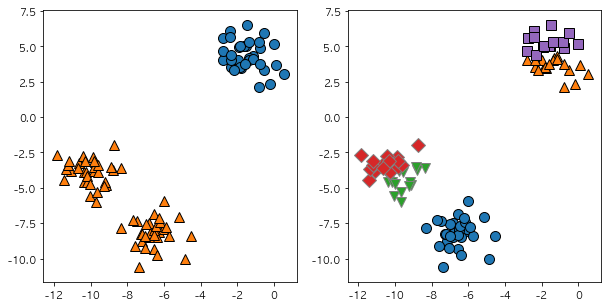

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

Text(0, 0.5, '특성 1')

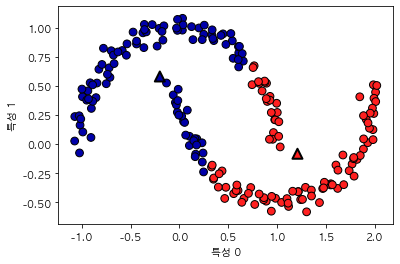

In [39]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, init='nndsvd', max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [ ]:

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={
    'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

In [ ]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

# 병합군집

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")


In [ ]:
mglearn.plots.plot_agglomerative()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")


In [ ]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
mglearn.plots.plot_dbscan()

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})


algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]


random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))


axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})


random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))


axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
   
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

In [ ]:
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

In [ ]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

### DBscan

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

In [ ]:
n_clusters = 10

km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:",
       np.bincount(labels_agg))
linkage_array = ward(X_pca)

plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

## 6주차 과제 후 고찰

- 이번 강의는 이전과는 다르게 이해하는데 많이 어려웠고 분량이 많다보니 실습과제를 진행하는데 있어서도 많은 시간이 필요하였다. 수학적인 부분에서 잘 이해를 많이 못하였고 시험공부 하면서 몰랐던 부분을 채워나가야겠다는 생각이든다.